## Introduction to Data Science

### Accessing and Manipulating Data in different formats

In [1]:
import os
import sys
import time
import datetime
import numpy as np
import pandas as pd
import pathlib

In [32]:
datapath = pathlib.Path("../datasets/CSVs/")
datapath2 = pathlib.Path('../datasets/Miscellaneous/')
datapath3 = pathlib.Path('../datasets/Figs//')
outputs = pathlib.Path("../outputs/")

## Acessing CSV Files

In [3]:
csvfile = "beatles-diskography.csv"
datafile = datapath / csvfile

#### Using pure Python:

In [4]:
data = []
#with open(datafile, "r") as f:
with open(os.path.join("../datasets/CSVs/", csvfile), "r") as f:
    keys = f.readline().split(',')
    keys = [k.strip() for k in keys]
    for i in range(5):
        values = f.readline().split(',')
        values = [v.strip() for v in values]
        d = dict(zip(keys,values))
        data.append(d)
data[0:2]

[{'BPI Certification': 'Gold',
  'Label': 'Parlophone(UK)',
  'RIAA Certification': 'Platinum',
  'Released': '22 March 1963',
  'Title': 'Please Please Me',
  'UK Chart Position': '1',
  'US Chart Position': '-'},
 {'BPI Certification': 'Platinum',
  'Label': 'Parlophone(UK)',
  'RIAA Certification': 'Gold',
  'Released': '22 November 1963',
  'Title': 'With the Beatles',
  'UK Chart Position': '1',
  'US Chart Position': '-'}]

#### Using [CSV](https://docs.python.org/3/library/csv.html) module:

In [5]:
import csv

In [6]:
#with open(datafile, "r") as f:
with open(os.path.join("../datasets/CSVs/", csvfile), "r") as f:
    #data2 = csv.reader(f)
    data2 = csv.DictReader(f)
    for row in data2:
        print(row)

OrderedDict([('Title', 'Please Please Me'), ('Released', '22 March 1963'), ('Label', 'Parlophone(UK)'), ('UK Chart Position', '1'), ('US Chart Position', '-'), ('BPI Certification', 'Gold'), ('RIAA Certification', 'Platinum')])
OrderedDict([('Title', 'With the Beatles'), ('Released', '22 November 1963'), ('Label', 'Parlophone(UK)'), ('UK Chart Position', '1'), ('US Chart Position', '-'), ('BPI Certification', 'Platinum'), ('RIAA Certification', 'Gold')])
OrderedDict([('Title', 'Beatlemania! With the Beatles'), ('Released', '25 November 1963'), ('Label', 'Capitol(CAN)'), ('UK Chart Position', '-'), ('US Chart Position', '-'), ('BPI Certification', ''), ('RIAA Certification', '')])
OrderedDict([('Title', 'Introducing... The Beatles'), ('Released', '10 January 1964'), ('Label', 'Vee-Jay(US)'), ('UK Chart Position', '-'), ('US Chart Position', '2'), ('BPI Certification', ''), ('RIAA Certification', '')])
OrderedDict([('Title', 'Meet the Beatles!'), ('Released', '20 January 1964'), ('Label'

#### Using Pandas:

In [7]:
df_csv = pd.read_csv(datafile)
df_csv.head()
#df_csv.info()

,Title,Released,Label,UK Chart Position,US Chart Position,BPI Certification,RIAA Certification
0,Please Please Me,22 March 1963,Parlophone(UK),1,-,Gold,Platinum
1,With the Beatles,22 November 1963,Parlophone(UK),1,-,Platinum,Gold
2,Beatlemania! With the Beatles,25 November 1963,Capitol(CAN),-,-,NaN,NaN
3,Introducing... The Beatles,10 January 1964,Vee-Jay(US),-,2,NaN,NaN
4,Meet the Beatles!,20 January 1964,Capitol(US),-,1,NaN,5xPlatinum


## Manipulating [Zip Files](https://docs.python.org/3/library/zipfile.html)

In [8]:
from zipfile import ZipFile

In [9]:
zipfile = "2013_ERCOT_Hourly_Load_Data"

In [11]:
with ZipFile('{0}.zip'.format(datapath / zipfile), 'r') as myzip:
    with myzip.open('2013_ERCOT_Hourly_Load_Data.xls') as myfile:
        pd_excel = pd.read_excel(myfile)
pd_excel.head()

,Hour_End,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,ERCOT
0,2013-01-01 01:00:00,7606.263544,1073.892438,1411.750567,784.978166,10369.094390,2206.675077,4368.490945,882.931901,28704.077028
1,2013-01-01 02:00:00,7388.082714,1035.021938,1403.472287,776.307387,10152.358518,2159.733208,4233.587967,872.404750,28020.968769
2,2013-01-01 03:00:00,7178.867878,1036.088697,1395.053150,768.125748,9988.051418,2065.114706,4082.862860,868.853938,27383.018395
3,2013-01-01 04:00:00,7038.822581,1032.648841,1395.508820,770.937969,9946.658655,1990.903699,4010.489608,865.701201,27051.671374
4,2013-01-01 05:00:00,6990.857940,1042.823044,1401.216842,779.089313,10096.664190,1954.807585,4038.655997,879.924249,27184.039160


## [Acessing](https://pypi.python.org/pypi/xlrd) and [Writing](https://pypi.python.org/pypi/xlwt) [Excel Files](https://github.com/python-excel/tutorial/blob/master/python-excel.pdf)

#### Accessing a workbook

In [12]:
import xlrd

In [13]:
datafile = "2013_ERCOT_Hourly_Load_Data.xls"

In [14]:
with ZipFile('{0}.zip'.format(datapath / zipfile), 'r') as myzip:
    myzip.extractall(datapath)

In [15]:
workbook = xlrd.open_workbook(datapath / datafile)
sheet = workbook.sheet_by_index(0)

In [16]:
sheet_data = [[sheet.cell_value(r, col) for col in range(sheet.ncols)] for r in range(sheet.nrows)]
sheet_data[:2]

[['Hour_End',
  'COAST',
  'EAST',
  'FAR_WEST',
  'NORTH',
  'NORTH_C',
  'SOUTHERN',
  'SOUTH_C',
  'WEST',
  'ERCOT'],
 [41275.041666666664,
  7606.263544000012,
  1073.892438,
  1411.7505669999982,
  784.9781659999992,
  10369.094390000051,
  2206.6750770000012,
  4368.490945000006,
  882.9319009999975,
  28704.077028000065]]

In [17]:
print("Number of rows in the sheet:"),
print(sheet.nrows)

Number of rows in the sheet:
7296


In [18]:
print("Type of data in cell (row 3, col 2):"), 
print(sheet.cell_type(3, 2))

Type of data in cell (row 3, col 2):
2


In [19]:
print("Value in cell (row 3, col 2):", )
print(sheet.cell_value(3, 2))

Value in cell (row 3, col 2):
1036.0886969999988


In [20]:
print("Get a slice of values in column 3, from rows 1-3:",)
print(sheet.col_values(3, start_rowx=1, end_rowx=4))

Get a slice of values in column 3, from rows 1-3:
[1411.7505669999982, 1403.4722870000019, 1395.053150000001]


In [21]:
coast = sheet.col_values(1, start_rowx=1)
data3 = {}    
data3['maxvalue'] = max(coast)
data3['minvalue'] = min(coast)
data3['avgcoast'] = np.mean(coast)

rowmax = coast.index(max(coast))+1
rowmin = coast.index(min(coast))+1

data3['maxtime'] = xlrd.xldate_as_tuple(sheet.cell_value(rowmax,0), 0)
data3['mintime'] = xlrd.xldate_as_tuple(sheet.cell_value(rowmin,0), 0)

In [22]:
data3

{'avgcoast': 10976.933460679784,
 'maxtime': (2013, 8, 13, 17, 0, 0),
 'maxvalue': 18779.025510000003,
 'mintime': (2013, 2, 3, 4, 0, 0),
 'minvalue': 6602.113898999982}

#### Using Pandas

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html  

In [23]:
pd_excel = pd.read_excel(datapath / datafile)
pd_excel.head()

,Hour_End,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,ERCOT
0,2013-01-01 01:00:00,7606.263544,1073.892438,1411.750567,784.978166,10369.094390,2206.675077,4368.490945,882.931901,28704.077028
1,2013-01-01 02:00:00,7388.082714,1035.021938,1403.472287,776.307387,10152.358518,2159.733208,4233.587967,872.404750,28020.968769
2,2013-01-01 03:00:00,7178.867878,1036.088697,1395.053150,768.125748,9988.051418,2065.114706,4082.862860,868.853938,27383.018395
3,2013-01-01 04:00:00,7038.822581,1032.648841,1395.508820,770.937969,9946.658655,1990.903699,4010.489608,865.701201,27051.671374
4,2013-01-01 05:00:00,6990.857940,1042.823044,1401.216842,779.089313,10096.664190,1954.807585,4038.655997,879.924249,27184.039160


#### Reading and Writing a Workbook

In [24]:
import xlwt

In [25]:
style0 = xlwt.easyxf('font: name Times New Roman, color-index red, bold on', num_format_str='#,##0.00')
style1 = xlwt.easyxf(num_format_str='D-MMM-YY')

In [26]:
workbook = xlwt.Workbook()
workbook_name = 'my_workbook.xls'

worksheet1 = workbook.add_sheet('my_first_sheet')
worksheet1.write(0, 0, 'Column 1 title', style0)
worksheet1.write(0, 1, 'Column 2 title', style0)

worksheet2 = workbook.add_sheet('my_second_sheet')
worksheet2.write(0, 0, 'Itens')
worksheet2.write(0, 1, 'Price')
worksheet2.write(1, 0, 'Rice')
worksheet2.write(1, 1, 100)
worksheet2.write(2, 0, 'Beans')
worksheet2.write(2, 1, 200)
worksheet2.write(3, 0, 'Pasta')
worksheet2.write(3, 1, 500)
worksheet2.write(5, 0, 'Total')

worksheet2.write(5, 1, xlwt.Formula("B2+B3+B4"))


workbook.save(outputs / workbook_name)

### Reading PDF Files

In [27]:
import textract

In [30]:
onlyfiles = [f for f in os.listdir(datapath2) if os.path.isfile(datapath2 / f) and f.endswith('.pdf')]
onlyfiles.sort()

print('Files in the folder:')
for i, w in enumerate(onlyfiles):
    print(i+1, '--' ,w)

Files in the folder:
1 -- Useful_Things_ML.pdf


In [31]:
text0 = textract.process(datapath2 / onlyfiles[0]).decode('utf-8')
print(text0[0:1000])

A Few Useful Things to Know about Machine Learning
Pedro Domingos
Department of Computer Science and Engineering
University of Washington
Seattle, WA 98195-2350, U.S.A.

pedrod@cs.washington.edu

ABSTRACT
Machine learning algorithms can figure out how to perform
important tasks by generalizing from examples. This is often feasible and cost-effective where manual programming
is not. As more data becomes available, more ambitious
problems can be tackled. As a result, machine learning is
widely used in computer science and other fields. However,
developing successful machine learning applications requires
a substantial amount of “black art” that is hard to find in
textbooks. This article summarizes twelve key lessons that
machine learning researchers and practitioners have learned.
These include pitfalls to avoid, important issues to focus on,
and answers to common questions.

correct output yt for future examples xt (e.g., whether the
spam filter correctly classifies previously unseen em

### Reading Text in Image Files (OCR)

In [33]:
onlyfiles = [f for f in os.listdir(datapath3) if os.path.isfile(datapath3 / f) and f.endswith('.png')]
onlyfiles.sort()

print('Files in the folder:')
for i, w in enumerate(onlyfiles):
    print(i+1, '--' ,w)

Files in the folder:
1 -- Cov_nonstationary.png
2 -- Mean_nonstationary.png
3 -- Modeling1.png
4 -- Modeling2.png
5 -- Modeling4.png
6 -- Var_nonstationary.png
7 -- binning.png
8 -- db_schema.png
9 -- entities1.png
10 -- entities2.png
11 -- framework.png
12 -- groupby-example.png
13 -- lenet_architecture-768x226.png
14 -- machine-learning-cheet-sheet.png
15 -- modeling3.png
16 -- neuralnet.png
17 -- neuralnet2.png
18 -- neuralnet3.png
19 -- neuralnet4.png
20 -- nmf.png
21 -- sup-unsup.png
22 -- textimage.png
23 -- transform-example.png
24 -- transmission.png
25 -- vehicle_class.png


In [38]:
text1 = textract.process(datapath3 / 'textimage.png').decode('utf-8')
print(text1[0:900])

Adobe, the Adobe logo, Acrobat, the Acrobat logo, Acrobat Capture, Adobe Garamond, Adobe
Intelligent Document Platform, Adobe PDF, Adobe Reader, Adobe Solutions Network, Aldus, Dis-
tiller, ePaper, Extreme, FrameMaker, Illustrator, InDesign, Minion, Myriad, PageMaker, Photo-
shop, Poetica, PostScript, and XMP are either registered trademarks or trademarks of Adobe
‘Systems Incorporated in the United States and/or other countries. Microsoft and Windows are
either registered trademarks or trademarks of Microsoft Corporation in the United States and/or
other countries. Apple, Mac, Macintosh, and Power Macintosh are trademarks of Apple Computer,
Inc,, registered in the United States and other countries. IBM is a registered trademark of IBM
Corporation in the United States. Sun is a trademark or registered trademark of Sun Microsys-
tems, Inc. in the United States and other countries. UNIX is


## Accessing HTML

https://docs.python.org/3/library/urllib.html  
http://www.crummy.com/software/BeautifulSoup/  
http://docs.python-requests.org/en/latest/  
http://lxml.de/  
https://docs.python.org/3/library/getpass.html  

In [39]:
import urllib
from bs4 import BeautifulSoup as bs
import requests
import lxml.html
import getpass

In [40]:
url = "http://oglobo.globo.com"
html_txt = urllib.request.urlopen(url).read()
soup = bs(html_txt, "html.parser")
 
[line.get('href') for line in soup.find_all('a')][0:10]    

['/',
 'http://memoria.oglobo.globo.com',
 'http://acervo.oglobo.globo.com',
 'ela/',
 'http://kogut.oglobo.globo.com',
 'rioshow/',
 'https://extra.globo.com',
 'http://classificados.globo.com',
 'http://clubeoglobo.com.br',
 'http://www.centraldoassinante.oglobo.com.br']

#### Another approach: [lxml](http://lxml.de/tutorial.html) instead of beautiful soup
 

In [41]:
url = "http://www.hotashtanga.com/p/letoltesek-downloads.html"
html_txt = urllib.request.urlopen(url).read()
dom =  lxml.html.fromstring(html_txt)
    
[line for line in dom.xpath('//a/@href')][0:10]   

['http://www.hotashtanga.com/',
 'https://drive.google.com/open?id=0B0t9QIGAtRQ5eGVjNDFaQmFhZXM',
 'https://drive.google.com/open?id=0B0t9QIGAtRQ5dnJEamZaWmpieGs',
 'https://drive.google.com/open?id=0B0t9QIGAtRQ5eGMzX0U4ZVFNNjA',
 'https://drive.google.com/open?id=0B0t9QIGAtRQ5WlZxM1BZdGcyNE0',
 'https://drive.google.com/open?id=0B0t9QIGAtRQ5ZzVLcUV4ZTItcm8',
 'https://drive.google.com/open?id=0B0t9QIGAtRQ5RmxId2RzYlA2ek0',
 'https://drive.google.com/open?id=0B0t9QIGAtRQ5ZU9Ta0NyUkMtWnc',
 'https://drive.google.com/open?id=0B0t9QIGAtRQ5SEM0UXBHVWlUeWc',
 'https://drive.google.com/open?id=0B0t9QIGAtRQ5aUU5TEZIYURCaUE']

#### Using [Requests](http://docs.python-requests.org/en/master/user/quickstart/), for more complex tasks  


c.f. [HTML Responses](http://www.w3.org/Protocols/rfc2616/rfc2616-sec10.html)

In [42]:
p = getpass.getpass()
r = requests.get('https://api.github.com/user', auth=('rsouza', p))
r.status_code

········


200

In [43]:
r.headers['content-type']

'application/json; charset=utf-8'

In [44]:
r.encoding

'utf-8'

In [45]:
r.text

'{"login":"rsouza","id":604914,"node_id":"MDQ6VXNlcjYwNDkxNA==","avatar_url":"https://avatars0.githubusercontent.com/u/604914?v=4","gravatar_id":"","url":"https://api.github.com/users/rsouza","html_url":"https://github.com/rsouza","followers_url":"https://api.github.com/users/rsouza/followers","following_url":"https://api.github.com/users/rsouza/following{/other_user}","gists_url":"https://api.github.com/users/rsouza/gists{/gist_id}","starred_url":"https://api.github.com/users/rsouza/starred{/owner}{/repo}","subscriptions_url":"https://api.github.com/users/rsouza/subscriptions","organizations_url":"https://api.github.com/users/rsouza/orgs","repos_url":"https://api.github.com/users/rsouza/repos","events_url":"https://api.github.com/users/rsouza/events{/privacy}","received_events_url":"https://api.github.com/users/rsouza/received_events","type":"User","site_admin":false,"name":"Renato Rocha Souza","company":"FGV","blog":"emap.fgv.br","location":"Rio de Janeiro","email":"rsouza.fgv@gmail.

In [46]:
r.json()

{'avatar_url': 'https://avatars0.githubusercontent.com/u/604914?v=4',
 'bio': 'https://www.linkedin.com/in/renato-rocha-souza-157153',
 'blog': 'emap.fgv.br',
 'collaborators': 0,
 'company': 'FGV',
 'created_at': '2011-02-07T15:46:45Z',
 'disk_usage': 1055136,
 'email': 'rsouza.fgv@gmail.com',
 'events_url': 'https://api.github.com/users/rsouza/events{/privacy}',
 'followers': 64,
 'followers_url': 'https://api.github.com/users/rsouza/followers',
 'following': 6,
 'following_url': 'https://api.github.com/users/rsouza/following{/other_user}',
 'gists_url': 'https://api.github.com/users/rsouza/gists{/gist_id}',
 'gravatar_id': '',
 'hireable': None,
 'html_url': 'https://github.com/rsouza',
 'id': 604914,
 'location': 'Rio de Janeiro',
 'login': 'rsouza',
 'name': 'Renato Rocha Souza',
 'node_id': 'MDQ6VXNlcjYwNDkxNA==',
 'organizations_url': 'https://api.github.com/users/rsouza/orgs',
 'owned_private_repos': 0,
 'plan': {'collaborators': 0,
  'name': 'free',
  'private_repos': 0,
  'sp

## Accessing [JSON](http://json.org/)

https://docs.python.org/3/library/json.html  
https://docs.python.org/3/library/urllib.html  

In [47]:
import json

In [48]:
base_url = "http://musicbrainz.org/ws/2/"
artist_url =  urllib.parse.urljoin(base_url, 'artist/')
query_type = {"simple": {},
              "atr": {"inc": "aliases+tags+ratings"},
              "aliases": {"inc": "aliases"},
              "releases": {"inc": "releases"}}

In [49]:
def query_site(url, params, uid="", fmt="json"):
    params["fmt"] = fmt
    r = requests.get(url + uid, params=params)
    print("requesting", r.url)

    if r.status_code == requests.codes.ok:
        return r.json()
    else:
        r.raise_for_status()

In [50]:
def query_by_name(url, params, name):
    params["query"] = "artist:" + name
    return query_site(url, params)

In [51]:
def pretty_print(data, indent=4):
    if type(data) == dict:
        print(json.dumps(data, indent=indent, sort_keys=True))
    else:
        print(data)

In [52]:
results = query_by_name(artist_url, query_type["simple"], "Nirvana")
pretty_print(results)

requesting http://musicbrainz.org/ws/2/artist/?query=artist%3ANirvana&fmt=json
{
    "artists": [
        {
            "area": {
                "id": "6a264f94-6ff1-30b1-9a81-41f7bfabd616",
                "name": "Finland",
                "sort-name": "Finland"
            },
            "country": "FI",
            "disambiguation": "Early 1980's Finnish punk band",
            "id": "85af0709-95db-4fbc-801a-120e9f4766d0",
            "life-span": {
                "ended": null
            },
            "name": "Nirvana",
            "score": "100",
            "sort-name": "Nirvana",
            "tags": [
                {
                    "count": 1,
                    "name": "punk"
                },
                {
                    "count": 1,
                    "name": "finland"
                }
            ],
            "type": "Group"
        },
        {
            "disambiguation": "French band from Martigues, activ during the 70s.",
            "id": "c49

In [53]:
results.keys()

dict_keys(['created', 'count', 'offset', 'artists'])

In [54]:
print("\nARTIST:")
pretty_print(results["artists"][4])


ARTIST:
{
    "aliases": [
        {
            "begin-date": null,
            "end-date": null,
            "locale": "ja",
            "name": "\u30cb\u30eb\u30f4\u30a1\u30fc\u30ca",
            "primary": true,
            "sort-name": "\u30cb\u30eb\u30f4\u30a1\u30fc\u30ca",
            "type": "Artist name"
        },
        {
            "begin-date": null,
            "end-date": null,
            "locale": null,
            "name": "Nirvana US",
            "primary": null,
            "sort-name": "Nirvana US",
            "type": null
        }
    ],
    "area": {
        "id": "489ce91b-6658-3307-9877-795b68554c98",
        "name": "United States",
        "sort-name": "United States"
    },
    "begin-area": {
        "id": "a640b45c-c173-49b1-8030-973603e895b5",
        "name": "Aberdeen",
        "sort-name": "Aberdeen"
    },
    "country": "US",
    "disambiguation": "90s US grunge band",
    "id": "5b11f4ce-a62d-471e-81fc-a69a8278c7da",
    "life-span": {
        "

In [55]:
artist_id = results["artists"][4]["id"]
artist_id

'5b11f4ce-a62d-471e-81fc-a69a8278c7da'

In [56]:
artist_data = query_site(artist_url, query_type["releases"], artist_id)
releases = artist_data["releases"]
print("\nONE RELEASE:")
pretty_print(releases[0], indent=2)

requesting http://musicbrainz.org/ws/2/artist/5b11f4ce-a62d-471e-81fc-a69a8278c7da?inc=releases&fmt=json

ONE RELEASE:
{
  "barcode": "",
  "country": "US",
  "date": "1990-01",
  "disambiguation": "",
  "id": "0444b84e-15af-47a4-810a-773258eb9395",
  "packaging": "Cardboard/Paper Sleeve",
  "packaging-id": "f7101ce3-0384-39ce-9fde-fbbd0044d35f",
  "quality": "normal",
  "release-events": [
    {
      "area": {
        "disambiguation": "",
        "id": "489ce91b-6658-3307-9877-795b68554c98",
        "iso-3166-1-codes": [
          "US"
        ],
        "name": "United States",
        "sort-name": "United States"
      },
      "date": "1990-01"
    }
  ],
  "status": "Official",
  "status-id": "4e304316-386d-3409-af2e-78857eec5cfe",
  "text-representation": {
    "language": "eng",
    "script": "Latn"
  },
  "title": "Never Mind the Bollocks Here\u2019s Nirvana"
}


In [57]:
releases

[{'barcode': '',
  'country': 'US',
  'date': '1990-01',
  'disambiguation': '',
  'id': '0444b84e-15af-47a4-810a-773258eb9395',
  'packaging': 'Cardboard/Paper Sleeve',
  'packaging-id': 'f7101ce3-0384-39ce-9fde-fbbd0044d35f',
  'quality': 'normal',
  'release-events': [{'area': {'disambiguation': '',
     'id': '489ce91b-6658-3307-9877-795b68554c98',
     'iso-3166-1-codes': ['US'],
     'name': 'United States',
     'sort-name': 'United States'},
    'date': '1990-01'}],
  'status': 'Official',
  'status-id': '4e304316-386d-3409-af2e-78857eec5cfe',
  'text-representation': {'language': 'eng', 'script': 'Latn'},
  'title': 'Never Mind the Bollocks Here’s Nirvana'},
 {'barcode': '5018615200826',
  'country': 'GB',
  'date': '1989-12',
  'disambiguation': '',
  'id': '180abab4-8480-4d1b-9a9c-db3d5e864390',
  'packaging': None,
  'packaging-id': None,
  'quality': 'normal',
  'release-events': [{'area': {'disambiguation': '',
     'id': '8a754a16-0027-3a29-b6d7-2b40ea0481ed',
     'iso-

In [58]:
release_titles = [r["title"] for r in releases]
print("\nALL TITLES:")
for t in release_titles:
        print(t)


ALL TITLES:
Never Mind the Bollocks Here’s Nirvana
Blew
Sliver
Bleach
Sliver
Love Buzz / Big Cheese
Smells Like Teen Spirit
Smells Like Teen Spirit
Here She Comes Now / Venus in Furs
Smells Like Teen Spirit
Smells Like Teen Spirit
Bleach
Sliver
Smells Like Teen Spirit
Blew
Candy / Molly’s Lips
Bleach
Sliver
Smells Like Teen Spirit
Nevermind
Bleach
Smells Like Teen Spirit
Bleach
Sliver
Nevermind


#### Using Pandas

http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader  

In [59]:
df_json = pd.read_json('https://api.github.com/repos/pydata/pandas/issues?per_page=5')
df_json

,assignee,assignees,author_association,body,closed_at,comments,comments_url,created_at,events_url,html_url,...,milestone,node_id,number,pull_request,repository_url,state,title,updated_at,url,user
0,NaN,[],MEMBER,- [x] tests passed\r\n- [x] passes `git diff u...,NaT,1,https://api.github.com/repos/pandas-dev/pandas...,2018-06-21 09:26:31,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/pull/21569,...,{'url': 'https://api.github.com/repos/pandas-d...,MDExOlB1bGxSZXF1ZXN0MTk2Mzg4ODkw,21569,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas,open,REF: multi_take is now able to tackle all list...,2018-06-21 09:38:09,https://api.github.com/repos/pandas-dev/pandas...,"{'login': 'toobaz', 'id': 1224492, 'node_id': ..."
1,NaN,[],MEMBER,"#### Code Sample, a copy-pastable example if p...",NaT,0,https://api.github.com/repos/pandas-dev/pandas...,2018-06-21 04:53:13,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/issues/21567,...,None,MDU6SXNzdWUzMzQzMzc3MDE=,21567,NaN,https://api.github.com/repos/pandas-dev/pandas,open,Inconsistent error where looking for label of ...,2018-06-21 04:53:13,https://api.github.com/repos/pandas-dev/pandas...,"{'login': 'toobaz', 'id': 1224492, 'node_id': ..."
2,NaN,[],CONTRIBUTOR,http://pandas-docs.github.io/pandas-docs-travi...,NaT,0,https://api.github.com/repos/pandas-dev/pandas...,2018-06-20 21:00:00,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/issues/21564,...,{'url': 'https://api.github.com/repos/pandas-d...,MDU6SXNzdWUzMzQyNDc0NjM=,21564,NaN,https://api.github.com/repos/pandas-dev/pandas,open,Tick DateOffset Normalize whatsnew entry has a...,2018-06-20 21:00:00,https://api.github.com/repos/pandas-dev/pandas...,"{'login': 'TomAugspurger', 'id': 1312546, 'nod..."
3,NaN,[],CONTRIBUTOR,"I know float16 is not very supported a lot, bu...",NaT,0,https://api.github.com/repos/pandas-dev/pandas...,2018-06-20 20:50:54,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/issues/21563,...,None,MDU6SXNzdWUzMzQyNDQ2NTM=,21563,NaN,https://api.github.com/repos/pandas-dev/pandas,open,float16 inconsistenly slow assignment,2018-06-20 20:55:51,https://api.github.com/repos/pandas-dev/pandas...,"{'login': 'hnykda', 'id': 2741256, 'node_id': ..."
4,NaN,[],NONE,"#### Code Sample, a copy-pastable example if p...",NaT,5,https://api.github.com/repos/pandas-dev/pandas...,2018-06-20 16:27:22,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/issues/21561,...,None,MDU6SXNzdWUzMzQxNTYyNzk=,21561,NaN,https://api.github.com/repos/pandas-dev/pandas,open,Test Case for to_csv to sys.stdout,2018-06-21 09:22:31,https://api.github.com/repos/pandas-dev/pandas...,"{'login': 'hawkeyej', 'id': 6677049, 'node_id'..."


## Accessing YAML

In [60]:
import yaml

In [61]:
with open(datapath / 'simple.yaml', 'r') as stream:
    try:
        print(yaml.load(stream))
    except yaml.YAMLError as exc:
        print(exc)

[{'martin': {'name': "Martin D'vloper", 'job': 'Developer', 'skills': ['python', 'perl', 'pascal']}}, {'tabitha': {'name': 'Tabitha Bitumen', 'job': 'Developer', 'skills': ['lisp', 'fortran', 'erlang']}}]


## Accessing XML

https://docs.python.org/3/library/urllib.html

https://docs.python.org/3/library/xml.etree.elementtree.html

http://lxml.de/

http://www.w3schools.com/xml/xml_examples.asp

In [62]:
from xml.dom import minidom
#from xml.etree import ElementTree as ET
from lxml import etree as ET #Supports xpath syntax
from collections import defaultdict
from pprint import pprint

In [63]:
url = 'http://www.w3schools.com/xml/cd_catalog.xml'
xml_page = urllib.request.urlopen(url).read()
e = ET.XML(xml_page)

In [64]:
def etree_to_dict(t):
    d = {t.tag: {} if t.attrib else None}
    children = list(t)
    if children:
        dd = defaultdict(list)
        for dc in map(etree_to_dict, children):
            for k, v in dc.items():
                dd[k].append(v)
        d = {t.tag: {k:v[0] if len(v) == 1 else v for k, v in dd.items()}}
    if t.attrib:
        d[t.tag].update(('@' + k, v) for k, v in t.attrib.items())
    if t.text:
        text = t.text.strip()
        if children or t.attrib:
            if text:
              d[t.tag]['#text'] = text
        else:
            d[t.tag] = text
    return d

In [65]:
pprint(etree_to_dict(e))

{'CATALOG': {'CD': [{'ARTIST': 'Bob Dylan',
                     'COMPANY': 'Columbia',
                     'COUNTRY': 'USA',
                     'PRICE': '10.90',
                     'TITLE': 'Empire Burlesque',
                     'YEAR': '1985'},
                    {'ARTIST': 'Bonnie Tyler',
                     'COMPANY': 'CBS Records',
                     'COUNTRY': 'UK',
                     'PRICE': '9.90',
                     'TITLE': 'Hide your heart',
                     'YEAR': '1988'},
                    {'ARTIST': 'Dolly Parton',
                     'COMPANY': 'RCA',
                     'COUNTRY': 'USA',
                     'PRICE': '9.90',
                     'TITLE': 'Greatest Hits',
                     'YEAR': '1982'},
                    {'ARTIST': 'Gary Moore',
                     'COMPANY': 'Virgin records',
                     'COUNTRY': 'UK',
                     'PRICE': '10.20',
                     'TITLE': 'Still got the blues',
                

In [66]:
raw_page = urllib.request.urlopen(url)
doc = minidom.parse(raw_page)

def findTextnodes(nodeList):
    for subnode in nodeList:
        if subnode.nodeType == subnode.ELEMENT_NODE:
            print("Element node: " + subnode.tagName)
            findTextnodes(subnode.childNodes)
        elif subnode.nodeType == subnode.TEXT_NODE:
            print("text node:" + subnode.data)
            
findTextnodes(doc.childNodes)

Element node: CATALOG
text node:
  
Element node: CD
text node:
    
Element node: TITLE
text node:Empire Burlesque
text node:
    
Element node: ARTIST
text node:Bob Dylan
text node:
    
Element node: COUNTRY
text node:USA
text node:
    
Element node: COMPANY
text node:Columbia
text node:
    
Element node: PRICE
text node:10.90
text node:
    
Element node: YEAR
text node:1985
text node:
  
text node:
  
Element node: CD
text node:
    
Element node: TITLE
text node:Hide your heart
text node:
    
Element node: ARTIST
text node:Bonnie Tyler
text node:
    
Element node: COUNTRY
text node:UK
text node:
    
Element node: COMPANY
text node:CBS Records
text node:
    
Element node: PRICE
text node:9.90
text node:
    
Element node: YEAR
text node:1988
text node:
  
text node:
  
Element node: CD
text node:
    
Element node: TITLE
text node:Greatest Hits
text node:
    
Element node: ARTIST
text node:Dolly Parton
text node:
    
Element node: COUNTRY
text node:USA
text node:
    
Elem

In [67]:
root = ET.fromstring(xml_page)
cdtags = root.xpath('//CD/TITLE')
for cd in cdtags:
    print(cd.text)

Empire Burlesque
Hide your heart
Greatest Hits
Still got the blues
Eros
One night only
Sylvias Mother
Maggie May
Romanza
When a man loves a woman
Black angel
1999 Grammy Nominees
For the good times
Big Willie style
Tupelo Honey
Soulsville
The very best of
Stop
Bridge of Spies
Private Dancer
Midt om natten
Pavarotti Gala Concert
The dock of the bay
Picture book
Red
Unchain my heart


In [68]:
for cd in root.findall('CD'):
    title = cd.find('TITLE').text
    artist = cd.find('ARTIST').text
    country = cd.find('COUNTRY').text
    print('{}\t{}\t{}'.format(artist, country, title))

Bob Dylan	USA	Empire Burlesque
Bonnie Tyler	UK	Hide your heart
Dolly Parton	USA	Greatest Hits
Gary Moore	UK	Still got the blues
Eros Ramazzotti	EU	Eros
Bee Gees	UK	One night only
Dr.Hook	UK	Sylvias Mother
Rod Stewart	UK	Maggie May
Andrea Bocelli	EU	Romanza
Percy Sledge	USA	When a man loves a woman
Savage Rose	EU	Black angel
Many	USA	1999 Grammy Nominees
Kenny Rogers	UK	For the good times
Will Smith	USA	Big Willie style
Van Morrison	UK	Tupelo Honey
Jorn Hoel	Norway	Soulsville
Cat Stevens	UK	The very best of
Sam Brown	UK	Stop
T'Pau	UK	Bridge of Spies
Tina Turner	UK	Private Dancer
Kim Larsen	EU	Midt om natten
Luciano Pavarotti	UK	Pavarotti Gala Concert
Otis Redding	USA	The dock of the bay
Simply Red	EU	Picture book
The Communards	UK	Red
Joe Cocker	USA	Unchain my heart


In [69]:
cds = []
for cd in root.findall('./CD'):
        data = {}
        data["TITLE"] = cd.find('./TITLE').text
        data["ARTIST"] = cd.find('./ARTIST').text
        data["COUNTRY"] = cd.find('./COUNTRY').text
        data["PRICE"] = cd.find('./PRICE').text
        data["YEAR"] = cd.find('./YEAR').text
        cds.append(data)
cds[0:3]

[{'ARTIST': 'Bob Dylan',
  'COUNTRY': 'USA',
  'PRICE': '10.90',
  'TITLE': 'Empire Burlesque',
  'YEAR': '1985'},
 {'ARTIST': 'Bonnie Tyler',
  'COUNTRY': 'UK',
  'PRICE': '9.90',
  'TITLE': 'Hide your heart',
  'YEAR': '1988'},
 {'ARTIST': 'Dolly Parton',
  'COUNTRY': 'USA',
  'PRICE': '9.90',
  'TITLE': 'Greatest Hits',
  'YEAR': '1982'}]

## Acessing Databases

### Acessing SQLite

https://docs.python.org/3/library/sqlite3.html

In [70]:
import sqlite3
conn = sqlite3.connect(os.path.join(outputs,'example.db'))

In [71]:
c = conn.cursor()

# Create table
c.execute('''CREATE TABLE IF NOT EXISTS stocks
             (date text, trans text, symbol text, qty real, price real)''')

# Insert a row of data
c.execute("INSERT INTO stocks VALUES ('2006-01-05','BUY','RHAT',100,35.14)")

# Save (commit) the changes
conn.commit()

# We can also close the connection if we are done with it.
# Just be sure any changes have been committed or they will be lost.
conn.close()

In [72]:
conn = sqlite3.connect(os.path.join(outputs,'example.db'))
c = conn.cursor()

In [73]:
t = ('RHAT',) #tuple with just one element
c.execute('SELECT * FROM stocks WHERE symbol=?', t)
print(c.fetchone())

('2006-01-05', 'BUY', 'RHAT', 100.0, 35.14)


In [74]:
# Larger example that inserts many records at a time
purchases = [('2006-03-28', 'BUY', 'IBM', 1000, 45.00),
             ('2006-04-05', 'BUY', 'MSFT', 1000, 72.00),
             ('2006-04-06', 'SELL', 'IBM', 500, 53.00),
            ]
c.executemany('INSERT INTO stocks VALUES (?,?,?,?,?)', purchases)

In [75]:
for row in c.execute('SELECT * FROM stocks ORDER BY price'):
        print(row)

('2006-01-05', 'BUY', 'RHAT', 100.0, 35.14)
('2006-03-28', 'BUY', 'IBM', 1000.0, 45.0)
('2006-04-06', 'SELL', 'IBM', 500.0, 53.0)
('2006-04-05', 'BUY', 'MSFT', 1000.0, 72.0)


#### Using Pandas

In [76]:
conn = sqlite3.connect(os.path.join(outputs,'example.db'))
df = pd.read_sql_query("SELECT * from stocks ORDER BY price", conn)

# verify that result of SQL query is stored in the dataframe
print(df.head())

conn.close()

         date trans symbol    qty  price
0  2006-01-05   BUY   RHAT  100.0  35.14


Deleting the database file:  

In [77]:
os.remove(os.path.join(outputs,'example.db'))

### Acessing MySQL  

https://pypi.python.org/pypi/PyMySQL  

In [78]:
import pymysql

In [76]:
p = getpass.getpass()
conn = pymysql.connect(host='localhost', port=3306, user='root', passwd=p,)# db='example')
cur = conn.cursor()

In [77]:
cur.execute("show databases;")
for r in cur.fetchall():
   print(r)

('information_schema',)
('mysql',)
('performance_schema',)
('sys',)
('test',)


In [78]:
cur.execute("use mysql;")
cur.execute("show tables;")
for r in cur.fetchall():
   print(r)

('columns_priv',)
('db',)
('engine_cost',)
('event',)
('func',)
('general_log',)
('gtid_executed',)
('help_category',)
('help_keyword',)
('help_relation',)
('help_topic',)
('innodb_index_stats',)
('innodb_table_stats',)
('ndb_binlog_index',)
('plugin',)
('proc',)
('procs_priv',)
('proxies_priv',)
('server_cost',)
('servers',)
('slave_master_info',)
('slave_relay_log_info',)
('slave_worker_info',)
('slow_log',)
('tables_priv',)
('time_zone',)
('time_zone_leap_second',)
('time_zone_name',)
('time_zone_transition',)
('time_zone_transition_type',)
('user',)


In [79]:
cur.execute("CREATE DATABASE IF NOT EXISTS test;")
cur.execute("USE test;")
cur.execute('''CREATE TABLE IF NOT EXISTS test_table 
               (text VARCHAR(200)
               DEFAULT NULL)
               ENGINE=MyISAM DEFAULT CHARSET='utf8';''')

cur.execute("show tables;")
for r in cur.fetchall():
   print(r)

('test_table',)


/usr/local/lib/python3.6/dist-packages/pymysql/cursors.py:166: Warning: (1007, "Can't create database 'test'; database exists")
  result = self._query(query)
/usr/local/lib/python3.6/dist-packages/pymysql/cursors.py:166: Warning: (1050, "Table 'test_table' already exists")
  result = self._query(query)


In [80]:
texts = ['It always seems impossible until its done.',
         'In order to succeed, we must first believe that we can.',
         'Life is 10% what happens to you and 90% how you react to it.',
         'Start where you are. Use what you have. Do what you can.',]
cur.executemany('INSERT INTO test.test_table (text) VALUES (%s)', texts)



4

In [81]:
cur.execute("SELECT * FROM test.test_table;")# LIMIT 10;")
for r in cur.fetchall():
   print(r)

('It always seems impossible until its done.',)
('In order to succeed, we must first believe that we can.',)
('Life is 10% what happens to you and 90% how you react to it.',)
('Start where you are. Use what you have. Do what you can.',)
('It always seems impossible until its done.',)
('In order to succeed, we must first believe that we can.',)
('Life is 10% what happens to you and 90% how you react to it.',)
('Start where you are. Use what you have. Do what you can.',)


#### Using Pandas

In [82]:
import pandas.io.sql as psql

In [83]:
df_mysql = psql.read_sql('select * from test.test_table;', con=conn)

In [84]:
df_mysql.head()

,text
0,It always seems impossible until its done.
1,"In order to succeed, we must first believe tha..."
2,Life is 10% what happens to you and 90% how yo...
3,Start where you are. Use what you have. Do wha...
4,It always seems impossible until its done.


In [85]:
cur.close()
conn.close()

### Acessing PostgreSQL 

In [86]:
import psycopg2

In [87]:
p = getpass.getpass()
try:
    conn = psycopg2.connect("dbname='testdb' user='rsouza' host='localhost' password='{}'".format(p))
except:
    print("I am unable to connect to the database")
cur = conn.cursor()

I am unable to connect to the database


In [110]:
cur.execute('SELECT * FROM postgres LIMIT 2;')
for r in cur.fetchall():
   print(r)

InternalError: current transaction is aborted, commands ignored until end of transaction block


#### Using Pandas

In [111]:
p = getpass.getpass()
try:
    conn = psycopg2.connect("dbname='postgres' user='rsouza' host='localhost' password='{}'".format(p))
except:
    print("I am unable to connect to the database")

In [ ]:
df_postgres = psql.read_sql('SELECT * FROM postgres LIMIT 5;', con=conn)
df_postgres.head()

### Acessing Mongo DB

http://api.mongodb.org/python/current/tutorial.html

In [132]:
from pymongo import MongoClient

In [133]:
client = MongoClient()
#client = MongoClient('localhost', 27017)
db = client.test_database #acessa ou cria o banco

## dropping a database via pymongo
#client.drop_database('test_database')

In [134]:
post = {"author": "Renato",
        "text": "My first blog post!",
        "tags": ["mongodb", "python", "pymongo"],
        "date": datetime.datetime.utcnow()}

In [ ]:
posts = db.posts # cria a coleção
post_id = posts.insert_one(post) #insere dados
post_id

## drop a collection via pymongo
#client['test_database'].drop_collection('posts')

In [ ]:
db.collection_names()

In [ ]:
posts.find_one()

In [ ]:
new_posts = [{"author": "Mike",
              "text": "Another post!",
              "tags": ["bulk", "insert"],
              "date": datetime.datetime(2009, 11, 12, 11, 14)},
             {"author": "Eliot",
              "title": "MongoDB is fun",
              "text": "and pretty easy too!",
              "date": datetime.datetime(2009, 11, 10, 10, 45)}]

In [ ]:
posts.insert_many(new_posts)

In [ ]:
posts.find_one({"author": "Mike"})

In [ ]:
#for post in posts.find({"author": "Mike"}):
for post in posts.find():
    print(post)

In [ ]:
posts.count()

#### Using Pandas

In [ ]:
example_pd = posts.find()
df_pandas =  pd.DataFrame(list(example_pd))
df_pandas

## Accessing Feeds RSS

http://www.feedparser.org/  
http://docs.python.org/library/re.html  
http://www.pythonware.com/library/pil/handbook/index.htm  

In [79]:
import feedparser

In [80]:
d = feedparser.parse('https://oglobo.globo.com/rss.xml')

In [81]:
print(d['feed']['title'])
print(d['feed']['link'])
#print(d.feed.subtitle)
print(len(d['entries']))

OGlobo
https://oglobo.globo.com/
10


In [82]:
print(d['entries'][0]['title']) 
print(d.entries[0]['link'])

Ex-peixeiro, Jhona Burjack ousa em capa de revista e atua ao lado de Rossy de Palma
https://oglobo.globo.com/ela/gente/ex-peixeiro-jhona-burjack-ousa-em-capa-de-revista-atua-ao-lado-de-rossy-de-palma-22805352


In [83]:
print(d.headers)

{'Date': 'Thu, 21 Jun 2018 11:41:54 GMT', 'Server': 'Apache', 'X-Frame-Options': 'SAMEORIGIN', 'Expires': '1529581324865', 'Content-Type': 'application/rss+xml;charset=UTF-8', 'Access-Control-Allow-Origin': '*', 'Vary': 'Accept-Encoding', 'Content-Encoding': 'gzip', 'Content-Length': '2756', 'cache-control': 'public, max-age=602', 'Age': '262', 'grace': 'none', 'X-Cache': 'HIT', 'X-Cache-Hits': '4', 'Accept-Ranges': 'bytes', 'Connection': 'close'}


In [84]:
for post in d.entries:
    print(post.title + ": " + post.link + "\n")

Ex-peixeiro, Jhona Burjack ousa em capa de revista e atua ao lado de Rossy de Palma: https://oglobo.globo.com/ela/gente/ex-peixeiro-jhona-burjack-ousa-em-capa-de-revista-atua-ao-lado-de-rossy-de-palma-22805352

Apesar da ordem de Trump, mais de 2.300 crianças continuam separadas dos pais: https://oglobo.globo.com/mundo/apesar-da-ordem-de-trump-mais-de-2300-criancas-continuam-separadas-dos-pais-22805286

Ferrari de modelo raro vai a leilão e deve ser vendida por US$ 45 milhões: https://oglobo.globo.com/economia/ferrari-de-modelo-raro-vai-leilao-deve-ser-vendida-por-us-45-milhoes-22805345

Artigo: No Brasil, a vulgaridade se cultiva com humor mais que duvidoso: https://oglobo.globo.com/esportes/artigo-no-brasil-vulgaridade-se-cultiva-com-humor-mais-que-duvidoso-22805265

'Animal doméstico deve ser visto como membro de família', diz paulista autorizado a visitar cadela: https://oglobo.globo.com/sociedade/animal-domesticodeve-ser-visto-como-membro-de-familia-diz-paulista-autorizadoa-visita

## Accessing Twitter

https://github.com/bear/python-twitter  
Go to http://twitter.com/apps/new to create an app and get these items  
See https://dev.twitter.com/docs/auth/oauth for more information on Twitter's OAuth implementation  
https://dev.twitter.com/rest/reference/get/account/verify_credentials  
https://dev.twitter.com/oauth/overview/application-owner-access-tokens  

In [85]:
import twitter

In [86]:
with open('/Documents/MMD/notebooks/twitter_tokens.txt', 'r') as twitter_tokens:
    tokens = twitter_tokens.read().split(',')
consumer_key = tokens[0].strip()
consumer_secret = tokens[1].strip()
access_token = tokens[2].strip()
access_token_secret = tokens[3].strip()

Construct, sign, and open a twitter request using the hard-coded credentials above.

In [87]:
api = twitter.Api(consumer_key=consumer_key, consumer_secret=consumer_secret, 
                  access_token_key=access_token, access_token_secret=access_token_secret)

In [88]:
print(api.VerifyCredentials())

{"created_at": "Thu Apr 09 10:44:07 +0000 2009", "description": "Researcher and Professor", "favourites_count": 29, "followers_count": 507, "friends_count": 147, "id": 29959702, "lang": "pt", "listed_count": 17, "location": "Rio de Janeiro", "name": "Renato Rocha Souza", "profile_background_color": "9AE4E8", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_image_url": "http://pbs.twimg.com/profile_images/503088023/Renato2_normal.JPG", "profile_link_color": "0084B4", "profile_sidebar_fill_color": "DDFFCC", "profile_text_color": "333333", "screen_name": "rrsouza", "status": {"created_at": "Sun Mar 18 00:32:30 +0000 2018", "favorite_count": 1, "id": 975168027816873985, "id_str": "975168027816873985", "in_reply_to_screen_name": "fccoelho", "in_reply_to_status_id": 974792170917056512, "in_reply_to_user_id": 7433062, "lang": "pt", "source": "<a href=\"http://twitter.com/download/android\" rel=\"nofollow\">Twitter for Android</a>", "text": "@fccoelh

In [89]:
users = api.GetFriends()
print([u.name for u in users])

['Star Control', '@Team9Spokes', 'programador andarilho', 'Ricky Gervais', 'Thomas Power', 'Randy Gage', 'Rosiene Dilly', 'The Web Foundation', 'Appus', 'Renata Avila', 'Golala Ruhani', 'Sandi Chimpala', 'Malavika Jayaram', 'Sthlm Internet Forum', 'NetApp Deutschland', 'Lu.CaaS', 'Carla Codeço Coelho', 'Overleaf', 'Cláudio Berrondo', 'Flávio Amieiro', 'Pablo Cerdeira', 'Cut the Rope', 'Machinalis', 'MiningTheSocialWeb', 'CNET News', 'ReadWrite', 'TNW', 'CNET', 'The Verge', 'Engadget', 'Lifehacker', 'Gizmodo', 'WIRED', 'TechCrunch', 'Ian Ozsvald', 'CNPq', 'Claudio Gnoli', 'strongsteam', 'Diana Maynard', 'Joyce Figueiró', 'Álvaro Justen', 'PyPLN', 'Open Source For You', 'TechRepublic', 'ZDNet', 'Twitter API', 'Udacity', 'Clarissa', 'Roberto R.S.Sobrinho', 'Luana Sales', 'Sensacionalista', 'André Branco', 'CMA', 'Asla Sá', 'Renata Teixeira', 'FGV EMAp', 'FGV', 'FGV Marketing', 'FGV CPDOC', 'Globant Brasil', 'Sheffield NLP', 'Débora Pereira', 'André Andrade', "O'Reilly Radar", 'Virgilio Al

In [90]:
followers = api.GetFollowers()
print([u.screen_name for u in followers])

['DannyKronstrom', 'sergioarifa', 'Lucasmrr', 'juliopl', 'FutureAdvocacy', 'anabiblio', 'liliaeeli', 'construtora_ld', 'LMacShadow', 'nan_nangelica', 'ValeriaMacedo22', 'ragarwa2', 'wmg_binho', 'Apbsvasconcelos', 'sethvanhooland', 'InnerSmart', 'ROMELZINHA', 'leticialves', 'rmwada', 'EnricoCalandro', 'MalJayaram', 'sandichimpala', 'Barbtinah', 'guyberger', 'solanasaurus', 'etaylaw', 'LeiKimmayong', 'hannahmccarrick', 'periodistagodoy', 'avilarenata', 'relayerlabs', 'JLdelda', 'micmars', 'AntonioMoneo', 'lucasparisi', 'cristinabg6', 'flor322003', 'klaussherzog', 'TTCSP', 'RosariaOtoni', 'ColumbiaGPI', 'karusimionato', 'mafradenise', 'aldemonica', 'Neurociencia', 'Renato_dxter', 'MMaurosilvareis', 'celiadiamantino', 'pamelabmachado', 'gabyprevidello', 'Stela_Maris_CS', 'SandraValeriacd', 'Dinieledfisica', 'FlorVsoares', 'KeilaRosado', 'Binoculocultura', 'swordjack', 'Krisluz32', 'klawasaki', 'jujudesouza2', 'MgDayanne', 'ignaciojrctp', 'mrbastos_', 'flavioamieiro', 'dayfamaral', 'llira5'

In [91]:
mentions = api.GetMentions()
#mentions[0].text
print([m.text for m in mentions])

['@rrsouza @fccoelho Vc aqui n twiter, q bom!', '@claumodesto1 @CarlosF487303 @rrsouza https://t.co/ApLZ5MTdAu', 'From #SIF17 panel with @avilarenata @gbengasesan @li_saga @solanasaurus @MalJayaram @rrsouza https://t.co/BHmQnGc65B https://t.co/EjSrBarPF2', '@avilarenata @sachavg @GreatDismal @rrsouza Truly was. Signs of a good panel: panelists themselves had fun &amp; learnt… https://t.co/ETpO8sO2HX', '@nnenna @MalJayaram @gbengasesan @li_saga @solanasaurus @rrsouza Thank you all!', '@MalJayaram @sachavg @GreatDismal @rrsouza Epic panel!', 'That was @sachavg, quoting from #HarryPotter. Pretty heavy on quotes, our panel: that, @GreatDismal (me) &amp; Hannah A… https://t.co/NFeYlt2EQs', 'Key point at @fxinternet this am: "Need to make technical questions society questions" @rrsouza #digitalrights #sif17 #leaveno1offine', '.@rrsouza: I refuse the conception of technological impact. We are the ones that choose what technology is. #SIF17 #SIF3B #LeaveNo1Offline', 'Retweeted Sandi Chimpala (

In [92]:
statuses = api.GetUserTimeline(screen_name='TIME')
print([s.text for s in statuses])

["TIME’s new cover: A reckoning after Trump's border separation policy: What kind of country are we?… https://t.co/iRrT5dtbp8", 'Ariana Grande and Pete Davidson are engaged https://t.co/p9bR3w7VZd', 'Algeria shuts off internet access to combat cheating on national exams https://t.co/07vV5bhvtc', 'American Civil Liberties Union sues U.S. government for access to "incommunicado" imprisoned immigrants https://t.co/gzxUpshqdc', 'Burger King apologizes for an ad offering free burgers to Russian women who get pregnant by World Cup players https://t.co/S7SZLDLyUC', '"Help my sisters." Chilling 911 call from teenage girl who escaped the Turpin family details abuse https://t.co/sU2ftvQJ8s', 'Marijuana will be legal in Canada in October, Prime Minister Justin Trudeau says https://t.co/sEvw7FIxtM', 'President Trump will meet Queen Elizabeth next month https://t.co/SNcpExR91l', "Organizer of the deadly 'Unite the Right' march in Charlottesville is planning a rally in Washington, D.C. https://t.co/

## Dealing with Big Files

Retrieving the file:

In [93]:
link = 'http://eforexcel.com/wp/wp-content/uploads/2017/07/1500000%20Sales%20Records.zip'

In [95]:
urllib.request.urlretrieve(link, "../datasets/CSVs/bigcsv.zip")

('../datasets/CSVs/bigcsv.zip', <http.client.HTTPMessage at 0x7fe24a6cc2e8>)

Using Pandas with chunks:

In [110]:
chunksize = 10 ** 5

with ZipFile("../datasets/CSVs/bigcsv.zip", 'r') as myzip:
    with myzip.open('1500000 Sales Records.csv') as myfile:
        chunks = pd.read_csv((myfile), chunksize=chunksize) #, iterator=True)
        df = chunks.get_chunk()
        print(df.head())
        print()
        df = chunks.get_chunk()
        print(df.head())

                         Region           Country  Item Type Sales Channel  \
0            Sub-Saharan Africa      South Africa     Fruits       Offline   
1  Middle East and North Africa           Morocco    Clothes        Online   
2         Australia and Oceania  Papua New Guinea       Meat       Offline   
3            Sub-Saharan Africa          Djibouti    Clothes       Offline   
4                        Europe          Slovakia  Beverages       Offline   

  Order Priority  Order Date   Order ID   Ship Date  Units Sold  Unit Price  \
0              M   7/27/2012  443368995   7/28/2012        1593        9.33   
1              M   9/14/2013  667593514  10/19/2013        4611      109.28   
2              M   5/15/2015  940995585    6/4/2015         360      421.89   
3              H   5/17/2017  880811536    7/2/2017         562      109.28   
4              L  10/26/2016  174590194   12/4/2016        3973       47.45   

   Unit Cost  Total Revenue  Total Cost  Total Profit  


Unzipping the file and reading line by line:

In [112]:
with ZipFile("../datasets/CSVs/bigcsv.zip", 'r') as myzip:
    myzip.extractall("../datasets/CSVs/")
    myzip.close()

In [113]:
def getstuff(filename):
    with open(filename, "r") as csvfile:
        datareader = csv.reader(csvfile)
        count = 0
        for row in datareader:
            yield(row)

In [114]:
count = 0
for row in getstuff("../datasets/CSVs/1500000 Sales Records.csv"):
    print(row)
    count +=1
    if count > 30:
        break

['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority', 'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']
['Sub-Saharan Africa', 'South Africa', 'Fruits', 'Offline', 'M', '7/27/2012', '443368995', '7/28/2012', '1593', '9.33', '6.92', '14862.69', '11023.56', '3839.13']
['Middle East and North Africa', 'Morocco', 'Clothes', 'Online', 'M', '9/14/2013', '667593514', '10/19/2013', '4611', '109.28', '35.84', '503890.08', '165258.24', '338631.84']
['Australia and Oceania', 'Papua New Guinea', 'Meat', 'Offline', 'M', '5/15/2015', '940995585', '6/4/2015', '360', '421.89', '364.69', '151880.40', '131288.40', '20592.00']
['Sub-Saharan Africa', 'Djibouti', 'Clothes', 'Offline', 'H', '5/17/2017', '880811536', '7/2/2017', '562', '109.28', '35.84', '61415.36', '20142.08', '41273.28']
['Europe', 'Slovakia', 'Beverages', 'Offline', 'L', '10/26/2016', '174590194', '12/4/2016', '3973', '47.45', '31.79', '188518.85'

#### Using Dask:

Read CSV¶

First we read our csv data.

CSV and other text-based file formats are the most common storage for data from many sources, because they require minimal pre-processing, can be written line-by-line and are human-readable. Since Pandas' read_csv is well-optimized, CSVs are a reasonable input, but far from optimized, since reading required extensive text parsing.

In [142]:
import dask
import dask.dataframe as dd
from dask import delayed, compute

df_csv = dd.read_csv('../datasets/CSVs/1500000 Sales Records.csv')
df_csv.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
1,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
2,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00
3,Sub-Saharan Africa,Djibouti,Clothes,Offline,H,5/17/2017,880811536,7/2/2017,562,109.28,35.84,61415.36,20142.08,41273.28
4,Europe,Slovakia,Beverages,Offline,L,10/26/2016,174590194,12/4/2016,3973,47.45,31.79,188518.85,126301.67,62217.18


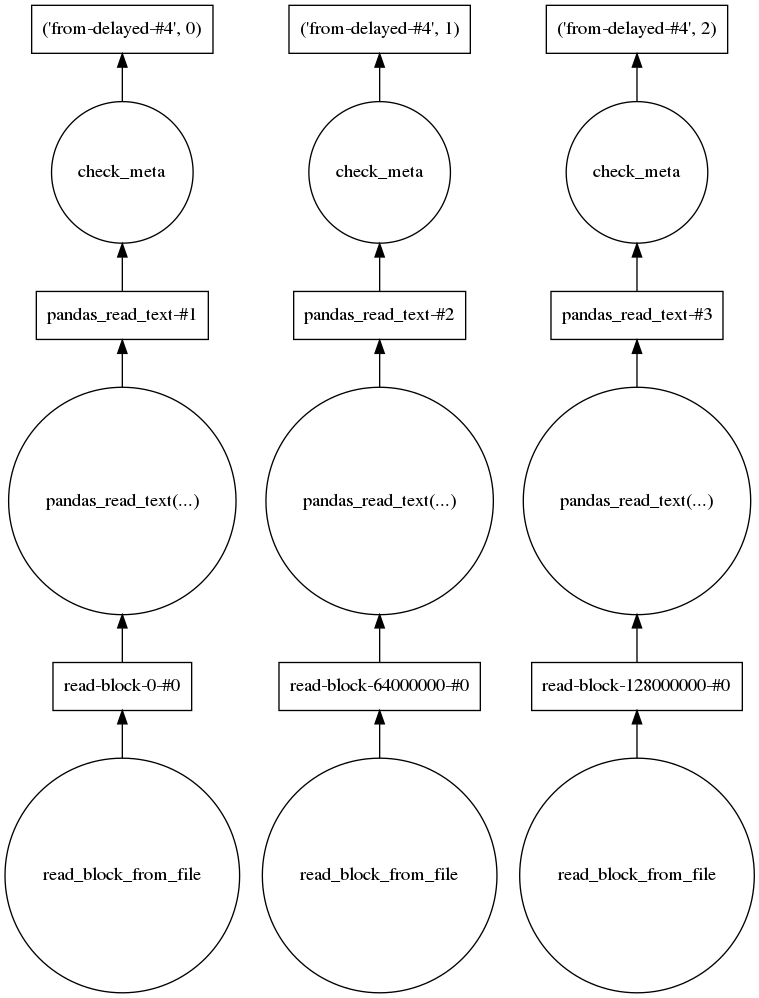

In [143]:
df_csv.visualize()

In [144]:
target = ('../datasets/CSVs/1500000 Sales Records.hdf')
target

'../datasets/CSVs/1500000 Sales Records.hdf'

In [145]:
%time df.to_hdf(target, '/data')

CPU times: user 12.6 s, sys: 1.59 s, total: 14.2 s
Wall time: 11.8 s


['../datasets/CSVs/1500000 Sales Records.hdf',
 '../datasets/CSVs/1500000 Sales Records.hdf',
 '../datasets/CSVs/1500000 Sales Records.hdf']

In [146]:
# same data as before
df_hdf = dd.read_hdf(target, '/data')
df_hdf.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
1,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
2,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00
3,Sub-Saharan Africa,Djibouti,Clothes,Offline,H,5/17/2017,880811536,7/2/2017,562,109.28,35.84,61415.36,20142.08,41273.28
4,Europe,Slovakia,Beverages,Offline,L,10/26/2016,174590194,12/4/2016,3973,47.45,31.79,188518.85,126301.67,62217.18


Compare CSV to HDF5 speeds

We do a simple computation that requires reading a column of our dataset and compare performance between CSV files and our newly created HDF5 file. Which do you expect to be faster?

In [147]:
%time df_csv['Total Profit'].sum().compute()

CPU times: user 4.21 s, sys: 456 ms, total: 4.67 s
Wall time: 2.36 s


588599904379.6101

In [148]:
%time df_hdf['Total Profit'].sum().compute()

CPU times: user 11.6 s, sys: 1.15 s, total: 12.8 s
Wall time: 12.7 s


588599904379.61

Sadly they are about the same, or perhaps even slower.

The culprit here are the columns which is of object dtype and thus hard to store efficiently. There are two problems here:
 - How do we store text data like names efficiently on disk?
 - Why did we have to read the names column when all we wanted was amount?  